# FAKE-REAL NEWS CLASSIFICATION USING MULTINOMIAL NAIVE BAYES

In [1]:
# imports
import numpy as np
import pandas as pd

In [2]:
# reading the data
df_real = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [3]:
# visualizing first few rows
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# visualizing first few rows
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# setting labels
df_real['Target'] = 1
df_fake['Target'] = 0

In [6]:
# concatenating both the dataframes into a single dataframe and shuffling the dataframe
df = pd.concat([df_real, df_fake], axis=0, join="inner")
df = df.sample(frac=1).reset_index(drop=True)
print("Total number of news records : " + str(len(df)))

Total number of news records : 44898


In [7]:
df.head(20)

,title,text,subject,date,Target
0,"Trump, lawmakers agree on disaster aid, debt l...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 6, 2017",1
1,Trump tells Netanyahu he would recognize Jerus...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"September 25, 2016",1
2,"Senate gun control vote on Monday, says a lead...",WASHINGTON (Reuters) - The U.S. Senate will mo...,politicsNews,"June 16, 2016",1
3,REPORT: Trump Laughed After Woman Was Grabbed...,Donald Trump is again under fire from allegati...,News,"October 17, 2016",0
4,What we know so far about the London train bomb,LONDON (Reuters) - An improvised explosive dev...,worldnews,"September 15, 2017",1
5,White House says some members of infrastructur...,WASHINGTON (Reuters) - Some members of a White...,politicsNews,"August 23, 2017",1
6,Iraqi forces retake border crossing with Syria...,ERBIL (Reuters) - Iraq s security forces retoo...,worldnews,"November 3, 2017",1
7,"ORLANDO ‘KNOWN WOLF’ Watched by FBI, Worked wi...",Shawn Helton 21st Century WireOrlando s Puls...,US_News,"June 16, 2016",0
8,PRICELESS! TRUMP DOES “KISS THE BABY” Like No ...,Donald trump was making the rounds at a Colora...,politics,"Jul 29, 2016",0
9,Indiana puts Donald Trump’s evangelical suppor...,INDIANAPOLIS (Reuters) - Donald Trump’s succes...,politicsNews,"May 2, 2016",1


# Data Analysis

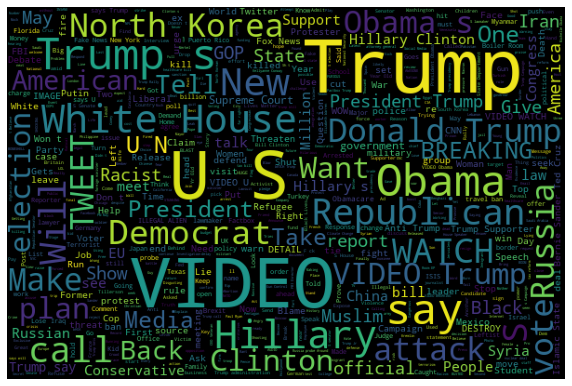

In [8]:
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px

wordcloud = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=80, max_words=5000,
                      width = 600, height = 400,
                      background_color='black').generate(' '.join(txt for txt in df["title"]))
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

<AxesSubplot:>

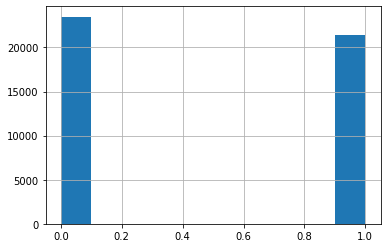

In [9]:
df['Target'].hist()

It can be observed that labels are reasonably balanced

In [10]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.bar(x = np.unique(df["subject"]),
y = [list(df["subject"]).count(i) for i in np.unique(df["subject"])] , 
            color = np.unique(df["subject"]),
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Subject")
fig.update_yaxes(title = "Number of Rows")
fig.update_layout(showlegend = False,
    title = {
        'text': 'News Subject Distribution',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [11]:
# only consider title and target column for classification
y = df['Target']
X = df['title']

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Model Building

In [13]:
# converting raw documents into feature matrix using a TF-IDF Vertorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english')
vect.fit(X_train)
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

mnb = MultinomialNB()
mnb.fit(X_train_transformed, y_train)

y_pred = mnb.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_pred)

0.9348552338530067